## Preparation

### Libraries and Global Variables

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

random_state = 42

### Importing dataset

In [14]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [15]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
df = pd.concat([X, y], axis=1)



## Exploratory Analysis

### Basic Information

In [16]:
df.shape

(6497, 12)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.head()

### YData Profiling Report

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df)

### Box plots 

In [ ]:
%matplotlib inline

features = df.columns[:-1]
n_rows = (len(features) + 1) // 2

plt.figure(figsize=(12, n_rows * 4))
for i, feature in enumerate(features):
    plt.subplot(n_rows, 2, i + 1)
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} vs Wine Quality')



plt.tight_layout()
plt.show()

### Histogram of the Output Score

In [ ]:
# Histogram of wine quality (target variable)
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

### Histogram of the All Features


### Correlation Heatmap of Input Features

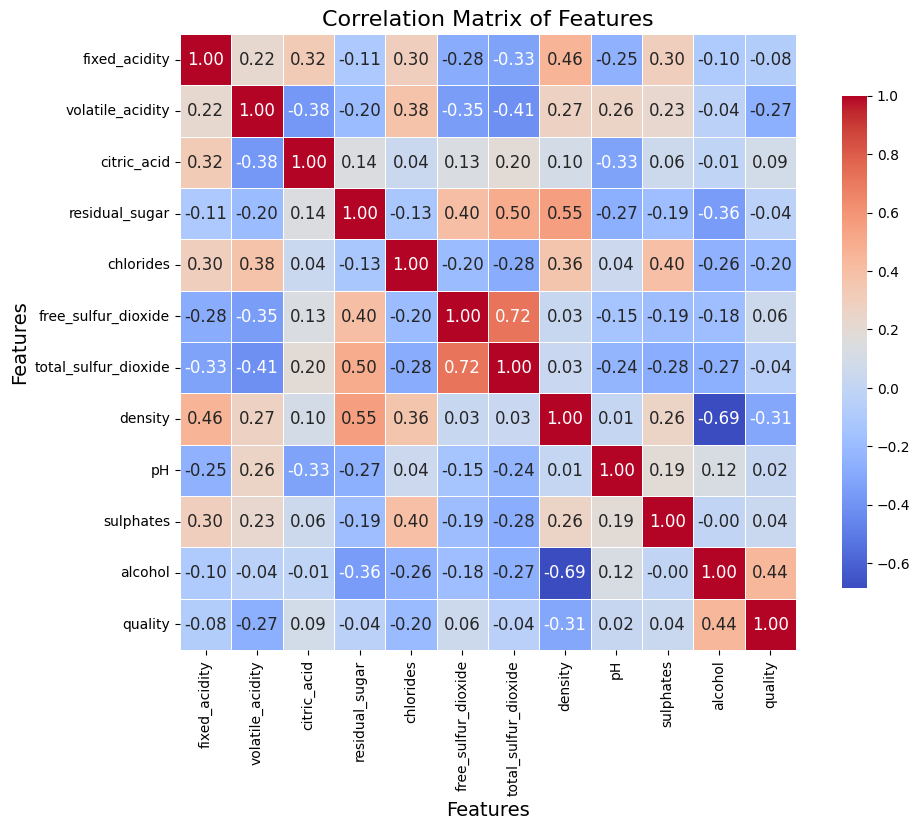

In [5]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,          # Show the correlation values
    cmap='coolwarm',     # Color palette for heatmap
    fmt='.2f',           # Format the correlation values to 2 decimal places
    linewidths=0.5,      # Add small linewidths between cells
    cbar_kws={'shrink': 0.8},  # Adjust the color bar size
    annot_kws={"size": 12},     # Increase the size of annotations for readability
    square=True          # Make the heatmap square (same width and height)
)

# Add title and labels for clarity
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()

## Data Preprocessing

### Train Test Split

We split data into training and testing sets, with 80% of the data in the training set, and 20% in the testing dataset, using random_state=42. We stratified using y because our target data is very imbalanced.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [18]:
print('Training data set size:', X_train.shape[0])
print('Testing data set size:', X_test.shape[0])

Training data set size: 5197
Testing data set size: 1300


### Data Scaling

We scaled the training data using standardization for models such as ANN. This was performed after the train test split to avoid data leakage.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Training and Evaluation

### Artificial Neural Network Model

#### ANN Training & Hyperparameter Tuning

In [21]:
# Ignore warnings to make the output cleaner
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.neural_network import MLPClassifier

y_train = np.ravel(y_train)  # reshaping to avoid warning

hidden_layers = [
    (100,),            # 1 layer with 100 nodes
    (200,),            # 1 layer with 200 nodes
    (100, 50),         # 2 layers: 100 nodes, then 50 nodes
    (200, 100),        # 2 layers: 200 nodes, then 100 nodes
    (100, 50, 25)      # 3 layers: 100 -> 50 -> 25
]

# Creating a grid of hyperparameters
param_grid = {
    'hidden_layer_sizes': hidden_layers,
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.005, 0.001],
    'max_iter': [1000],
    'solver': ['adam', 'sgd', 'lbfgs'],
}

# Creating ANN model
ann_model = MLPClassifier(random_state=random_state)



In [34]:
# Performing Grid Search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ann_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


KeyboardInterrupt: 

In [35]:
# Best estimator
best_ann_model = grid_search.best_estimator_
y_pred_ann = best_ann_model.predict(X_test_scaled)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

#### ANN Model Evaluation

In [29]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann))
print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[  0   1   2   2   1   0   0]
 [  1  14  18   8   2   0   0]
 [  2  16 270 120  20   0   0]
 [  1  12 114 366  62  12   0]
 [  0   0  18  61 123  14   0]
 [  0   0   2   9  15  13   0]
 [  0   0   0   1   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.33      0.33      0.33        43
           5       0.64      0.63      0.63       428
           6       0.65      0.65      0.65       567
           7       0.55      0.57      0.56       216
           8       0.33      0.33      0.33        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.36      0.36      0.36      1300
weighted avg       0.60      0.60      0.60      1300

Accuracy: 0.60



### K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#### FNN Training

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train.iloc[:, 0].values.ravel()) # there is some error for pandas datafram
knn_pred = knn_classifier.predict(X_test)
print("K-Nearest Neighbors Classifier")
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, knn_pred))

#### Fine tuning for KNN

In [ ]:
#fine tuning using Gridsearch
param_grid = { 'n_neighbors': [3, 5, 7, 9, 11, 13], 'weights': ['uniform', 'distance'], 'p': [1, 2] }
#the 1 and 2 are different types of distance, manhattan or euclidean
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    #verbose=2
)
grid_search_knn.fit(X_train, y_train.iloc[:, 0].values.ravel())
best_knn = grid_search_knn.best_estimator_
print("Best Parameters for KNN:", grid_search_knn.best_params_)
y_best_pred_knn = best_knn.predict(X_test)
print("Confusion Matrix:",confusion_matrix(y_test, y_best_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_best_pred_knn, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, y_best_pred_knn))


### Support Vector Machine

Support Vector Classifier
Best Parameters for SVM: {'C': 50, 'kernel': 'rbf'}

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.16      0.18        43
           5       0.62      0.62      0.62       428
           6       0.61      0.67      0.64       567
           7       0.55      0.47      0.50       216
           8       0.64      0.36      0.46        39
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.37      0.33      0.34      1300
weighted avg       0.59      0.59      0.59      1300


Accuracy Score: 0.5930769230769231

Grid Search Results (Mean Scores and Parameters):
    mean_test_score  mean_train_score  param_C param_kernel  \
0          0.536847          0.538131     0.05       linear   
1          0.480277          0.489321     0.05         poly   
2          0.520880     

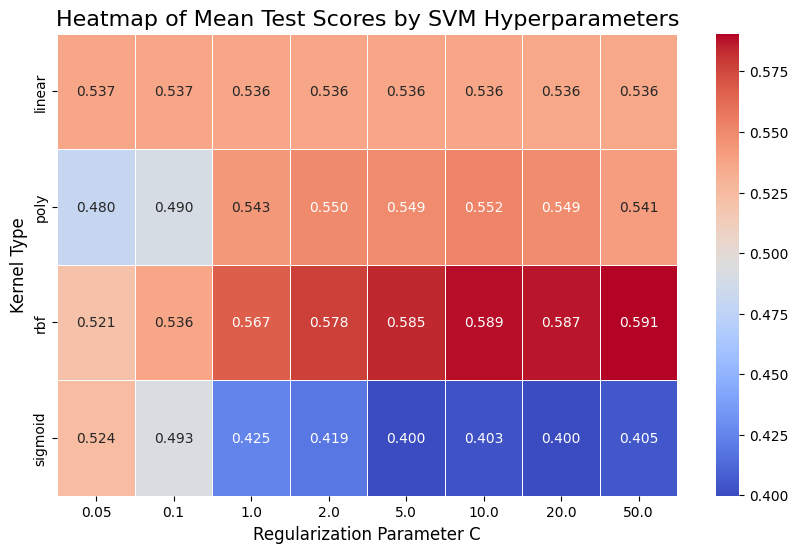

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Fine-tuning using GridSearch
param_grid = {
    'C': [0.05, 0.1, 1, 2, 5, 10, 20, 50],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    # 'degree': [2, 3, 4, 5],
    # 'coef0': [0, 0.1, 1]
}
grid_search_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=4,
    n_jobs=-1,
    scoring='accuracy', 
    return_train_score=True,  # This ensures that train scores are included in the output
)

# Fit the grid search
grid_search_svm.fit(X_train_scaled, y_train.iloc[:, 0].values.ravel())

# Best estimator and parameters
best_svm = grid_search_svm.best_estimator_
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Predict using the best model
y_best_pred_svm = best_svm.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_best_pred_svm, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, y_best_pred_svm))

# Print results of each parameter combination
results = grid_search_svm.cv_results_

# Create a DataFrame from the grid search results for better readability
results_df = pd.DataFrame(results)

# You can display relevant columns like mean_test_score, mean_train_score, parameters, etc.
results_df = results_df[['mean_test_score', 'mean_train_score', 'param_C', 'param_kernel', 'params']]

# Print the results
print("\nGrid Search Results (Mean Scores and Parameters):")
print(results_df)

# Optionally, you can save it to a CSV file if you want to export it
results_df.to_csv("grid_search_results.csv", index=False)

# Pivot the dataframe to create a format suitable for heatmap
heatmap_data = results_df.pivot(index="param_kernel", columns="param_C", values="mean_test_score")

# Set up the plot
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Mean Test Scores by SVM Hyperparameters', fontsize=16)
plt.xlabel('Regularization Parameter C', fontsize=12)
plt.ylabel('Kernel Type', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# Create a parameter grid with only gamma values when C=50 and kernel='rbf'
param_grid = {
    'C': [50],  # Fixed value for C
    'kernel': ['rbf'],  # Fixed value for kernel
    'gamma': [0.01, 0.1, 1, 10, 'scale', 'auto']  # Test different gamma values
}

# Create the SVC model
svm = SVC()

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=4, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train.iloc[:, 0].values.ravel())

# Output the best gamma found during cross-validation
print("Best gamma:", grid_search.best_params_['gamma'])

# Extract the grid search results into a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Filter out relevant columns for the table display
results_table = results_df[['params', 'mean_test_score', 'std_test_score']]

# Rename columns for clarity
results_table.columns = ['Hyperparameters', 'Mean Test Score', 'Standard Deviation']

# Save the results to a CSV file
results_table.to_csv("grid_search_results_gamma.csv", index=False)

# Optionally, you can evaluate the best model on the test set
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))


Fitting 4 folds for each of 6 candidates, totalling 24 fits
Best gamma: 1

Test Accuracy: 0.6538461538461539


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
print("Best Parameters:", grid_search.best_params_)

best_svm_classifier = SVC(kernel=grid_search.best_params_['kernel'], C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], random_state=random_state)
best_svm_classifier.fit(X_train_scaled, y_train.iloc[:, 0].values.ravel())
y_pred_best_svm = best_svm_classifier.predict(X_test_scaled)
print("Best SVM Classifier")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_best_svm, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_best_svm))
print("f1 Score:", f1_score(y_test, y_pred_best_svm, average='weighted', zero_division=0))
print("Precision Score:", precision_score(y_test, y_pred_best_svm, average='weighted', zero_division=0))
print("Recall Score:", recall_score(y_test, y_pred_best_svm, average='weighted', zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_svm))

best_svm_classifier.fit(X_train, y_train.iloc[:, 0].values.ravel())
y_pred_best_svm = best_svm_classifier.predict(X_test)
print("Best SVM Classifier")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_best_svm, zero_division=0))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_best_svm))
print("f1 Score:", f1_score(y_test, y_pred_best_svm, average='weighted', zero_division=0))
print("Precision Score:", precision_score(y_test, y_pred_best_svm, average='weighted', zero_division=0))
print("Recall Score:", recall_score(y_test, y_pred_best_svm, average='weighted', zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_svm))

Best Parameters: {'C': 50, 'gamma': 1, 'kernel': 'rbf'}
Best SVM Classifier

Accuracy Score: 0.6538461538461539
f1 Score: 0.6449556101998539
Precision Score: 0.6481168865016659
Recall Score: 0.6538461538461539
Confusion Matrix:
 [[  0   0   2   4   0   0   0]
 [  0   6  16  21   0   0   0]
 [  0   5 286 128   8   1   0]
 [  0   2  85 417  59   4   0]
 [  0   0  11  74 127   4   0]
 [  0   0   2  18   5  14   0]
 [  0   0   0   1   0   0   0]]
Best SVM Classifier

Accuracy Score: 0.6169230769230769
f1 Score: 0.581203051589705
Precision Score: 0.729950111656099
Recall Score: 0.6169230769230769
Confusion Matrix:
 [[  0   0   0   6   0   0   0]
 [  0   4   6  33   0   0   0]
 [  0   0 159 268   1   0   0]
 [  0   1  18 546   2   0   0]
 [  0   0   3 132  80   1   0]
 [  0   0   1  25   0  13   0]
 [  0   0   0   1   0   0   0]]
